In [183]:
import cv2, sys, glob
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

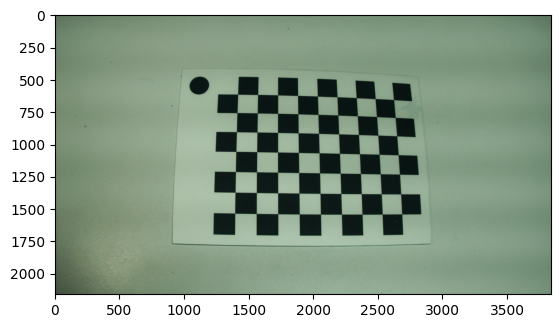

In [194]:
# refer to https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html

%matplotlib inline

path_to_file = "2025-03-10-104553.jpg"
img = cv2.imread(path_to_file)
height, width = img.shape[:2]
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [195]:
checkerboard_units_x = 7
checkerboard_units_y = 9

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
found, corners = cv2.findChessboardCorners(gray_image, (checkerboard_units_x, checkerboard_units_y), None)
print(found)

True


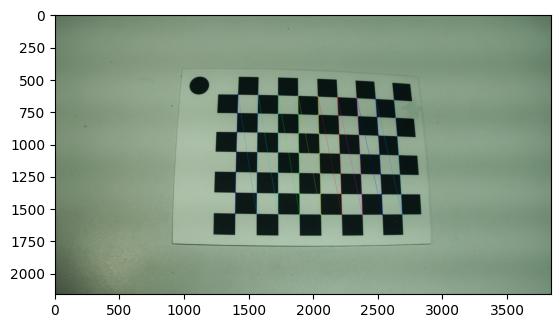

In [196]:
# if found == True
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

objp = np.zeros((checkerboard_units_y * checkerboard_units_x, 3), np.float32)
objp[:,:2] = np.mgrid[0:checkerboard_units_x, 0:checkerboard_units_y].T.reshape(-1, 2)

objpoints = []
imgpoints = []

objpoints.append(objp)
corners2 = cv2.cornerSubPix(gray_image, corners, (11, 11), (-1,-1), criteria)
imgpoints.append(corners2)

img_checkerboard_corners = cv2.drawChessboardCorners(img, (checkerboard_units_x, checkerboard_units_y), corners2, found)
plt.imshow(img_checkerboard_corners)
plt.show()

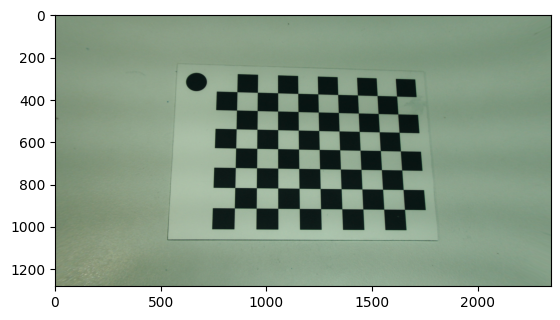

In [202]:
res, M, distort_coeff, rot_v, trans_v = cv2.calibrateCamera(objpoints, imgpoints, gray_image.shape[::-1], None, None)
camera_M, roi = cv2.getOptimalNewCameraMatrix(M, distort_coeff, (width, height), 1, (width, height))

# undistort
undistorted_img = cv2.undistort(img, M, distort_coeff, None, camera_M)
 
# crop the image
x, y, roi_width, roi_height = roi
undistorted_img = undistorted_img[y:y + roi_height, x:x + roi_width]
plt.imshow(undistorted_img)
plt.show()

In [210]:
np.savez("./calibration/20250310-Arducam.npz", camera_M = camera_M, distort_coeff = distort_coeff)

In [212]:
npzfile = np.load("./calibration/20250310-Arducam.npz")
npzfile["distort_coeff"]

array([[-5.68872343e-01,  8.07703442e-01,  2.23490185e-02,
         4.05205818e-03, -6.99338962e+00]])